
# 270. Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ(Vision)ÏùÑ ÏúÑÌïú Ï†ÑÏù¥ÌïôÏäµ(Transfer Learning)
=======================================================

- Ïã§Ï†úÎ°ú Ï∂©Î∂ÑÌïú ÌÅ¨Í∏∞Ïùò Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Í∞ñÏ∂îÍ∏∞Îäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎìúÎ¨ºÍ∏∞ ÎïåÎ¨∏Ïóê, (Î¨¥ÏûëÏúÑ Ï¥àÍ∏∞ÌôîÎ•º ÌÜµÌï¥) Ï≤òÏùåÎ∂ÄÌÑ∞ Ìï©ÏÑ±Í≥± Ïã†Í≤ΩÎßù(Convolutional Network) Ï†ÑÏ≤¥Î•º ÏûëÏÑ±ÌïòÎäî Í≤ΩÏö∞Îäî Îß§Ïö∞ Ï†ÅÎã§.   


- ÎåÄÏã†, Îß§Ïö∞ ÌÅ∞ Îç∞Ïù¥ÌÑ∞ÏÖã(Ïòà. 100Í∞ÄÏßÄ Î∂ÑÎ•òÏóê ÎåÄÌï¥ 120ÎßåÍ∞úÏùò Ïù¥ÎØ∏ÏßÄÍ∞Ä Ìè¨Ìï®Îêú ImageNet)ÏóêÏÑú Ìï©ÏÑ±Í≥± Ïã†Í≤ΩÎßù(ConvNet)ÏùÑ ÎØ∏Î¶¨ ÌïôÏäµÌïú ÌõÑ, Ïù¥ Ìï©ÏÑ±Í≥± Ïã†Í≤ΩÎßùÏùÑ Í¥ÄÏã¨ÏûàÎäî ÏûëÏóÖÏùÑ ÏúÑÌïú Ï¥àÍ∏∞ ÏÑ§Ï†ï ÎòêÎäî Í≥†Ï†ïÎêú ÌäπÏßï Ï∂îÏ∂úÍ∏∞(fixed feature extractor)Î°ú ÏÇ¨Ïö©

### Ï†ÑÏù¥ÌïôÏäµÏùò 2 Í∞ÄÏßÄ ÏãúÎÇòÎ¶¨Ïò§:

-  **Ìï©ÏÑ±Í≥± Ïã†Í≤ΩÎßùÏùò ÎØ∏ÏÑ∏Ï°∞Ï†ï(finetuning)**: Ïã†Í≤ΩÎßùÏùÑ ImageNet Îì±ÏúºÎ°ú ÎØ∏Î¶¨ ÌïôÏäµÌïú Ïã†Í≤ΩÎßùÏúºÎ°ú Ï¥àÍ∏∞ÌôîÌïòÍ≥† parameter ÎØ∏ÏÑ∏ Ï°∞Ï†ï  


-  **Í≥†Ï†ïÎêú ÌäπÏßï Ï∂îÏ∂úÍ∏∞Î°úÏç®Ïùò Ìï©ÏÑ±Í≥± Ïã†Í≤ΩÎßù**: ÎßàÏßÄÎßâ ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µÏùÑ Ï†úÏô∏Ìïú Î™®Îì† Ïã†Í≤ΩÎßùÏùò Í∞ÄÏ§ëÏπòÎ•º Í≥†Ï†ï. ÎßàÏßÄÎßâÏùò ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µÏùÄ ÏÉàÎ°úÏö¥ Î¨¥ÏûëÏúÑÏùò Í∞ÄÏ§ëÏπòÎ•º Í∞ñÎäî Í≥ÑÏ∏µÏúºÎ°ú ÎåÄÏ≤¥ÎêòÏñ¥ Ïù¥ Í≥ÑÏ∏µÎßå ÌïôÏäµ.  


### torch Ï†úÍ≥µ pre-trained models
```
    import torchvision.models as models  
    
    resnet18 = models.resnet18()  
    alexnet = models.alexnet()  
    vgg16 = models.vgg16()  
    squeezenet = models.squeezenet1_0()  
    densenet = models.densenet161()  
    inception = models.inception_v3()  
    googlenet = models.googlenet()  
    shufflenet = models.shufflenet_v2_x1_0()  
    mobilenet = models.mobilenet_v2()  
    resnext50_32x4d = models.resnext50_32x4d()  
    wide_resnet50_2 = models.wide_resnet50_2()  
    mnasnet = models.mnasnet1_0()  
```   

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
---------------

- **Í∞úÎØ∏** ÏôÄ **Î≤å** ÏùÑ Î∂ÑÎ•òÌïòÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏ÏùÑ ÌïôÏäµ
    - ÎåÄÎûµ 120Ïû• Ï†ïÎèÑÏùò ÌõàÎ†® Ïù¥ÎØ∏ÏßÄÏôÄ, 75Ïû•Ïùò Í≤ÄÏ¶ùÏö© Ïù¥ÎØ∏ÏßÄÎ•º Ïù¥Ïö©
    - Ï†ÑÏù¥ÌïôÏäµÏùÑ ÌÜµÌï¥ ÏÜåÎüâÏùò Îç∞Ïù¥ÌÑ∞Î°úÎèÑ ÏùºÎ∞òÌôî Í∞ÄÎä•
    - ImageNetÏùò ÏùºÎ∂Ä data Ïù¥Ïö©

-  Îç∞Ïù¥ÌÑ∞Î•º [Ïó¨Í∏∞](https://download.pytorch.org/tutorial/hymenoptera_data.zip)
   ÏóêÏÑú Îã§Ïö¥Î°úÎìú Î∞õÏïÑ ÌòÑÏû¨ ÎîîÎ†âÌÜ†Î¶¨Ïóê ÏïïÏ∂ïÏùÑ ÌëºÎã§

In [2]:
!wget  https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip -q "hymenoptera_data.zip"

--2025-02-10 08:46:21--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.239.83.16, 18.239.83.126, 18.239.83.32, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.239.83.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‚Äòhymenoptera_data.zip‚Äô

hymenoptera_data.zi 100%[===================>]  45.10M   173MB/s    in 0.3s    

2025-02-10 08:46:21 (173 MB/s) - ‚Äòhymenoptera_data.zip‚Äô saved [47286322/47286322]



In [3]:
# Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞Ä(augmentation) Î∞è ResNet Ïóê Ï†ÅÌï©Ìïú normalization Ï†ÅÏö©
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),  # Ïù¥ÎØ∏ÏßÄÎ•º Î¨¥ÏûëÏúÑ ÌÅ¨Í∏∞ Î∞è ÎπÑÏú®Î°ú ÏûêÎ•∏ ÌõÑ 224x224Î°ú Ï°∞Ï†ï
        transforms.RandomHorizontalFlip(),  # Ïù¥ÎØ∏ÏßÄÎ•º 50% ÌôïÎ•†Î°ú ÏàòÌèâÏúºÎ°ú Îí§ÏßëÏùå
        transforms.ToTensor(),  # Ïù¥ÎØ∏ÏßÄÎ•º PyTorch ÌÖêÏÑúÎ°ú Î≥ÄÌôò
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ÌÖêÏÑúÏùò Ï±ÑÎÑêÎ≥Ñ ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞®Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ï†ïÍ∑úÌôî
    ]),

    'val': transforms.Compose([
        transforms.Resize(256),  # Ïù¥ÎØ∏ÏßÄÏùò ÏßßÏùÄ Ï∏°ÏùÑ 256 ÌîΩÏÖÄÎ°ú Ï°∞Ï†ï
        transforms.CenterCrop(224),  # Ïù¥ÎØ∏ÏßÄ Ï§ëÏïôÏùÑ 224x224 ÌÅ¨Í∏∞Î°ú ÏûêÎ¶Ñ
        transforms.ToTensor(),  # Ïù¥ÎØ∏ÏßÄÎ•º PyTorch ÌÖêÏÑúÎ°ú Î≥ÄÌôò
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ÌÖêÏÑúÏùò Ï±ÑÎÑêÎ≥Ñ ÌèâÍ∑† Î∞è ÌëúÏ§ÄÌé∏Ï∞®Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ï†ïÍ∑úÌôî
    ]),
}


# ImageFolder ÎùºÏù¥Î∏åÎü¨Î¶¨

- Í≥ÑÏ∏µÏ†ÅÏù∏ Ìè¥Îçî Íµ¨Ï°∞Î•º Í∞ÄÏßÄÍ≥† ÏûàÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨Ïò¨ Îïå ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§. Í∞Å Ïù¥ÎØ∏ÏßÄÎì§Ïù¥ ÏûêÏã†Ïùò Î†àÏù¥Î∏î(Label) Ïù¥Î¶ÑÏúºÎ°ú Îêú Ìè¥Îçî ÏïàÏóê Îì§Ïñ¥Í∞Ä ÏûàÎäî Íµ¨Ï°∞ÎùºÎ©¥, ImageFolder ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÏó¨ Ïù¥Î•º Î∞îÎ°ú Î∂àÎü¨ÏôÄ Í∞ùÏ≤¥Î°ú ÎßåÎì§Î©¥ ÎêúÎã§.

ImageFolderÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑ† Í∞ÄÏû• Î®ºÏ†Ä ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Ïùò Ìè¥ÎçîÍµ¨Ï°∞Î•º ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÏÑ§Í≥ÑÌï¥ÏïºÌïúÎã§  

ÏµúÏÉÅÏúÑ Í≤ΩÎ°ú ÏïÑÎûòÏóê Í∞ÅÍ∞ÅÏùò class nameÏùÑ Í∞ÄÏßÄÎäî Ìè¥ÎçîÎ•º Íµ¨ÏÑ±ÌïòÍ≥† Í∑∏ ÌïòÏúÑÍ≤ΩÎ°úÏóê Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•ÎêòÏñ¥ÏûàÎäî Î∞©ÏãùÏù¥Îã§.
```
root_dir
    | --- ants/
    |      |-- 0001.jpg
    |      |-- 0002.jpg
    |      |-- ...
    | --- bees/
    |      |-- 0001.jpg
    |      |-- 0002.jpg
    |      |-- ...
    | --- rabbit/
    |      |--...
```

In [4]:
data_dir = 'hymenoptera_data'
train_dir = os.path.join(data_dir, 'train')
val_dir  = os.path.join(data_dir, 'val')

print(os.listdir(data_dir))
print(os.listdir(train_dir))
print(os.listdir(val_dir))

['val', 'train']
['bees', 'ants']
['bees', 'ants']


### `datasets.ImageFolder(folder, transform)` data loader ÏÉùÏÑ±

In [7]:
# datasets.ImageFolderÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î°úÎìú
# Ïù¥ Ìï®ÏàòÎäî Ï£ºÏñ¥ÏßÑ ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°úÏóêÏÑú Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§ÏùÑ ÏûêÎèôÏúºÎ°ú Ï∞æÏïÑÏÑú Î†àÏù¥Î∏îÏùÑ Ìï†Îãπ
# data_dirÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÄÏû•Îêú Î£®Ìä∏ ÎîîÎ†âÌÜ†Î¶¨
# 'train' Ìè¥Îçî ÏïàÏóê ÏûàÎäî Ïù¥ÎØ∏ÏßÄÎì§ÏùÄ ÌõàÎ†®ÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©
train_data = datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms['train'])

val_data = datasets.ImageFolder(os.path.join(data_dir, 'val'), data_transforms['val'])

# DataLoaderÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú Î∞∞ÏπòÎ•º Ï§ÄÎπÑ
# - num_workers=4: Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÎäî Îç∞ ÏÇ¨Ïö©Ìï† ÏÑúÎ∏å ÌîÑÎ°úÏÑ∏Ïä§ Í∞úÏàò (ÏÑ±Îä• ÏµúÏ†ÅÌôî)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=4)

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú DataLoader ÏÑ§Ï†ï
val_loader = torch.utils.data.DataLoader(val_data, batch_size=4, shuffle=True, num_workers=4)

In [8]:
class_names = train_data.classes
class_names

['ants', 'bees']

In [9]:
print(len(train_data), len(val_data))
print(class_names)

244 153
['ants', 'bees']


### ÏùºÎ∂Ä Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôîÌïòÍ∏∞

- `torchvision.utils.make_grid(tensor)`  
  - `tensor (Tensor ÎòêÎäî list)`: 4Ï∞®Ïõê ÌÖêÏÑú `(B x C x H x W)` ÌòïÌÉúÏùò ÎØ∏Îãà Î∞∞Ïπò ÌÖêÏÑú ÎòêÎäî Í∞ôÏùÄ ÌÅ¨Í∏∞Ïùò Ïù¥ÎØ∏ÏßÄ Î¶¨Ïä§Ìä∏ÏûÖÎãàÎã§. (Ïó¨Í∏∞ÏÑú BÎäî Ïù¥ÎØ∏ÏßÄ Í∞úÏàò, CÎäî Ï±ÑÎÑê Ïàò, HÏôÄ WÎäî Ïù¥ÎØ∏ÏßÄÏùò ÎÜíÏù¥ÏôÄ ÎÑàÎπÑ)  
  - `nrow (int, ÏÑ†ÌÉù)`: Ìïú Ï§ÑÏóê ÌëúÏãúÌï† Ïù¥ÎØ∏ÏßÄ Í∞úÏàòÏûÖÎãàÎã§. ÏµúÏ¢Ö Í∑∏Î¶¨ÎìúÎäî `(B / nrow, nrow)` ÌòïÌÉúÍ∞Ä Îê©ÎãàÎã§. Í∏∞Î≥∏Í∞íÏùÄ 8ÏûÖÎãàÎã§.

In [10]:
def imshow(inp, title=None):
    # ÏûÖÎ†• ÌÖêÏÑúÎ•º NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôòÌïòÍ≥† Ï∞®ÏõêÏùÑ Ïû¨Î∞∞Ïó¥Ìï©ÎãàÎã§. PyTorchÎäî Ïù¥ÎØ∏ÏßÄÎ•º [C, H, W] ÌòïÏãùÏúºÎ°ú Ï≤òÎ¶¨ÌïòÏßÄÎßå,
    # matplotlibÎäî [H, W, C] ÌòïÏãùÏùÑ ÏöîÍµ¨ÌïòÎØÄÎ°ú, Ï∞®ÏõêÏùò ÏàúÏÑú Î≥ÄÍ≤Ω
    inp = inp.numpy().transpose(1, 2, 0)

    # Ïù¥ÎØ∏ÏßÄÎ•º Ï†ïÍ∑úÌôîÌï† Îïå ÏÇ¨Ïö©Îêú ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î•º Ï†ïÏùò. Ïù¥ Í∞íÎì§ÏùÄ Î™®Îç∏Ïù¥ ÌïôÏäµÎê† Îïå ÏÇ¨Ïö©Îêú Í∞íÎì§Í≥º ÏùºÏπòÌï¥Ïïº Ìï©ÎãàÎã§.
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])

    # Ï†ïÍ∑úÌôîÎêú Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º ÏõêÎûòÏùò Î≤îÏúÑÎ°ú ÎêòÎèåÎ¶ΩÎãàÎã§.
    inp = inp * std + mean

    # np.clip Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Ïùò Í∞íÏù¥ 0Í≥º 1 ÏÇ¨Ïù¥Î°ú Ï†úÌïúÎê©ÎãàÎã§. Ïù¥Îäî Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º Ï†ÅÏ†àÌïú Î≤îÏúÑ ÎÇ¥Î°ú Ï°∞Ï†ïÌïòÍ∏∞ ÏúÑÌï®ÏûÖÎãàÎã§.
    inp = np.clip(inp, 0, 1)

    # Ï†úÎ™©Ïù¥ ÏûàÏùÑ Í≤ΩÏö∞ Ïù¥ÎØ∏ÏßÄ ÏúÑÏóê Ï†úÎ™©ÏùÑ ÌëúÏãúÌï©ÎãàÎã§.
    if title is not None:
        plt.title(title)

    plt.imshow(inp)

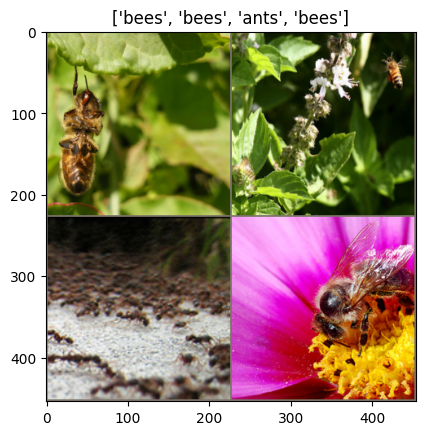

In [11]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Î°úÎçîÏóêÏÑú Ï≤´ Î≤àÏß∏ Î∞∞ÏπòÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
inputs, classes = next(iter(train_loader))

# Í∞ÄÏ†∏Ïò® Ïù¥ÎØ∏ÏßÄ Î∞∞ÏπòÎ•º Í∑∏Î¶¨Îìú ÌòïÌÉúÎ°ú ÎßåÎì≠ÎãàÎã§. nrow=2Îäî Ìïú ÌñâÏóê Ïù¥ÎØ∏ÏßÄÎ•º Îëê Í∞úÏî© Î∞∞ÏπòÌïòÍ≤†Îã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§.
out = torchvision.utils.make_grid(inputs, nrow=2)

# ÎßåÎì§Ïñ¥ÏßÑ Ïù¥ÎØ∏ÏßÄ Í∑∏Î¶¨ÎìúÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
# titleÏóêÎäî Í∞Å Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÏùÑ ÌëúÏãúÌïòÍ∏∞ ÏúÑÌï¥ classes Î∞∞Ïó¥ÏóêÏÑú Í∞Å ÌÅ¥ÎûòÏä§ Ïù∏Îç±Ïä§Ïóê Ìï¥ÎãπÌïòÎäî Ïù¥Î¶ÑÏùÑ Ï°∞ÌöåÌïòÏó¨ Î¶¨Ïä§Ìä∏Î°ú ÎßåÎì≠ÎãàÎã§.
imshow(out, title=[class_names[x] for x in classes])

Model Train
--------------

##  Fine-Tuning vs Feature Extraction ÎπÑÍµê

|  | **Fine-Tuning (Î∞©Î≤ï 1)** | **Feature Extraction (Î∞©Î≤ï 2)** |
|---|-----------------|-------------------|
| **ÌõàÎ†®ÎêòÎäî Í∞ÄÏ§ëÏπò** | Ï†ÑÏ≤¥ ÎÑ§Ìä∏ÏõåÌÅ¨ | ÎßàÏßÄÎßâ FC Î†àÏù¥Ïñ¥Îßå |
| **ÌïôÏäµ ÏÜçÎèÑ** | ÎäêÎ¶º | Îπ†Î¶Ñ |
| **ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞** | ÌÅ¨Î©¥ Ï¢ãÏùå | ÏûëÏïÑÎèÑ Í∞ÄÎä• |
| **Ïò§Î≤ÑÌîºÌåÖ ÏúÑÌóò** | ÏûàÏùå (Îç∞Ïù¥ÌÑ∞ Ï†ÅÏùÑ Í≤ΩÏö∞) | Ï†ÅÏùå |
| **Ï†ÅÏùëÎ†•** | ÏÉà Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÏµúÏ†ÅÌôî Í∞ÄÎä• | Í∏∞Ï°¥ ÌäπÏßïÏùÑ ÌôúÏö© |  


    1Ô∏è. Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÌÅ¨Í≥† Ï∂©Î∂ÑÌïú Í≤ΩÏö∞ ‚Üí **Fine-Tuning**  
    üîπ ÌïôÏäµ ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¨ÏßÄÎßå, Î™®Îç∏ ÏÑ±Îä•Ïù¥ Îçî ÎÜíÏïÑÏßà Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº  

    2Ô∏è. Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏûëÍ≥† Ï†úÌïúÏ†ÅÏù∏ Í≤ΩÏö∞ ‚Üí **Feature Extraction**  
    üîπ Îπ†Î•¥Í≤å ÌïôÏäµÌï† Ïàò ÏûàÏúºÎ©∞, Í≥ºÏ†ÅÌï© Í∞ÄÎä•ÏÑ±Ïù¥ ÎÇÆÏùå  


## Î∞©Î≤ï 1. pre-trained  ResNet Ïã†Í≤ΩÎßù Ï†ÑÏ≤¥Î•º ÎØ∏ÏÑ∏Ï°∞Ï†ï(finetuning)

- ÎØ∏Î¶¨ ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò® ÌõÑ ÎßàÏßÄÎßâÏùò ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µ ÎßåÏùÑ ÏÉàÎ°ú ÏûëÏÑ±ÌïòÍ≥† **Ï†ÑÏ≤¥ parameter** Î•º fine tuning

In [12]:
# torchvisionÏùò models Î™®ÎìàÏóêÏÑú ÏÇ¨Ï†Ñ ÌïôÏäµÎêú(pretrained) ResNet-18 Î™®Îç∏ÏùÑ Î°úÎìú
model_ft = torchvision.models.resnet18(weights="DEFAULT")

# Î™®Îç∏Ïùò ÎßàÏßÄÎßâ ÏôÑÏ†Ñ Ïó∞Í≤∞(fully connected, fc) Î†àÏù¥Ïñ¥Ïùò ÏûÖÎ†• ÌäπÏßï(feature) ÏàòÎ•º Ï°∞Ìöå
# Ïù¥ Í∞íÏùÄ ResNet-18 Î™®Îç∏Ïùò ÎßàÏßÄÎßâ Î†àÏù¥Ïñ¥Ïóê ÏûÖÎ†•ÎêòÎäî ÌäπÏßï Î≤°ÌÑ∞Ïùò Ï∞®Ïõê ÏàòÏûÖÎãàÎã§.
num_features = model_ft.fc.in_features

# Ï°∞ÌöåÌïú ÌäπÏßï Ïàò Ï∂úÎ†•
print(num_features)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 44.7M/44.7M [00:00<00:00, 189MB/s]

512


In [13]:
# fc layer Ï∂úÎ†•Ïùò ÌÅ¨Í∏∞Î•º 1000 ÏóêÏÑú 2Î°ú Î≥ÄÍ≤Ω
model_ft.fc = nn.Linear(num_features, 2)
model_ft.fc

Linear(in_features=512, out_features=2, bias=True)

In [14]:
# Î™®Îç∏ÏùÑ ÌòÑÏû¨ ÏÇ¨Ïö© Ï§ëÏù∏ ÎîîÎ∞îÏù¥Ïä§(CPU ÎòêÎäî GPU)Î°ú Ïù¥ÎèôÏãúÌÇµÎãàÎã§.
model_ft.to(device)

# ÏÜêÏã§ Ìï®ÏàòÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº ÏÜêÏã§ÏùÑ ÏÇ¨Ïö©
criterion = nn.CrossEntropyLoss()

# Î™®Îç∏Ïùò Î™®Îì† Îß§Í∞úÎ≥ÄÏàòÎ•º ÏµúÏ†ÅÌôî ÎåÄÏÉÅÏúºÎ°ú Ìï©ÎãàÎã§.
# SGD ÏÇ¨Ïö©. ÌïôÏäµÎ•†(lr)ÏùÄ 0.001, Î™®Î©òÌÖÄÏùÄ 0.9Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨ (ÏÑ±Îä•Ïù¥ Ìñ•ÏÉÅÎêòÏßÄ ÏïäÏùÑ Îïå ÏûêÎèô Ï°∞Ï†ï)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, mode="max", patience=3, factor=0.1)

In [17]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    s = time.time()  # ÌõàÎ†® ÏãúÏûë ÏãúÍ∞Ñ

    # ÏµúÍ≥†Ïùò Î™®Îç∏ Í∞ÄÏ§ëÏπòÎ•º Ï†ÄÏû•ÌïòÍ∏∞ ÏúÑÌïú Î≥ÄÏàò. Ï¥àÍ∏∞Í∞íÏùÄ ÌòÑÏû¨ Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0  # ÏßÄÍ∏àÍπåÏßÄÏùò ÏµúÍ≥† Ï†ïÌôïÎèÑ

    for epoch in range(num_epochs):  # ÏóêÌè≠ ÏàòÎßåÌÅº Î∞òÎ≥µ
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        model.train()  # Î™®Îç∏ÏùÑ ÌõàÎ†® Î™®ÎìúÎ°ú ÏÑ§Ï†ï
        train_loss = 0  # ÌõàÎ†® ÏÜêÏã§ Ï¥àÍ∏∞Ìôî
        train_acc = 0   # ÌõàÎ†® Ï†ïÌôïÎèÑ Ï¥àÍ∏∞Ìôî

        for x, y in train_loader:  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∞∞Ïπò Îã®ÏúÑÎ°ú ÏàúÌöå
            x, y = x.to(device), y.to(device)  # Îç∞Ïù¥ÌÑ∞Î•º ÌòÑÏû¨ ÎîîÎ∞îÏù¥Ïä§Î°ú Ïù¥Îèô

            optimizer.zero_grad()  # ÏòµÌã∞ÎßàÏù¥Ï†ÄÏùò Í∑∏ÎùºÎîîÏñ∏Ìä∏ Ï¥àÍ∏∞Ìôî

            z = model(x)  # Î™®Îç∏ÏùÑ ÌÜµÌï¥ ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
            preds = z.argmax(1)  # Í∞ÄÏû• ÎÜíÏùÄ Í∞íÏùÑ Í∞ÄÏßÑ Ïù∏Îç±Ïä§Î•º ÏòàÏ∏°Í∞íÏúºÎ°ú ÏÑ†ÌÉù

            loss = criterion(z, y)  # ÏÜêÏã§ Í≥ÑÏÇ∞
            loss.backward()  # ÏÜêÏã§Ïóê ÎåÄÌïú Í∑∏ÎùºÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞
            optimizer.step()  # Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò ÏóÖÎç∞Ïù¥Ìä∏

            train_loss += loss.item() * x.size(0)  # Î∞∞Ïπò ÏÜêÏã§ ÎàÑÏ†Å
            train_acc += torch.sum(preds == y).item()  # Ï†ïÌôïÌïú ÏòàÏ∏°Ïùò Ïàò ÎàÑÏ†Å

        train_acc /= len(train_data)  # ÏóêÌè≠Îãπ ÌèâÍ∑† ÌõàÎ†® Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
        train_loss /= len(train_data)  # ÏóêÌè≠Îãπ ÌèâÍ∑† ÌõàÎ†® ÏÜêÏã§ Í≥ÑÏÇ∞

        scheduler.step(train_loss)  # ÏóêÌè≠ÎßàÎã§ ÌïôÏäµÎ•† Ï°∞Ï†ï

        model.eval()  # Î™®Îç∏ÏùÑ ÌèâÍ∞Ä Î™®ÎìúÎ°ú ÏÑ§Ï†ï
        val_loss = 0  # Í≤ÄÏ¶ù ÏÜêÏã§ Ï¥àÍ∏∞Ìôî
        val_acc = 0  # Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ Ï¥àÍ∏∞Ìôî

        with torch.inference_mode():  # Í∑∏ÎùºÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ ÎπÑÌôúÏÑ±Ìôî
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)

                z = model(x)
                preds = z.argmax(1)

                loss = criterion(z, y)

                val_loss += loss.item() * x.size(0)
                val_acc += torch.sum(preds == y).item()

        val_acc /= len(val_data)  # ÏóêÌè≠Îãπ ÌèâÍ∑† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
        val_loss /= len(val_data)  # ÏóêÌè≠Îãπ ÌèâÍ∑† Í≤ÄÏ¶ù ÏÜêÏã§ Í≥ÑÏÇ∞

        print(f'Epoch {epoch+1}/{num_epochs}==> train loss: {train_loss:.4f}, ' +
              f'val loss: {val_loss:.4f}, train acc: {train_acc:.2f}, ' +
              f'val acc: {val_acc:.2f}')

        # ÌòÑÏû¨ ÏóêÌè≠Ïùò Î™®Îç∏Ïù¥ Ïù¥Ï†Ñ ÏóêÌè≠Ïùò Î™®Îç∏Î≥¥Îã§ Ï¢ãÏùÄ Í≤ΩÏö∞, Ï†ïÎ≥¥Î•º Í∞±Ïã†Ìï©ÎãàÎã§.
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - s  # ÌõàÎ†® ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # Í∞ÄÏû• ÎÇòÏùÄ Î™®Îç∏ Í∞ÄÏ§ëÏπòÎ•º Î∂àÎü¨Ïò¥
    model.load_state_dict(best_model_wts)
    return model

In [18]:
model_ft = train_model(model_ft, criterion, optimizer_ft, scheduler, num_epochs=25)

Epoch 0/24
----------
Epoch 1/25==> train loss: 0.5287, val loss: 0.1549, train acc: 0.80, val acc: 0.94
Epoch 1/24
----------
Epoch 2/25==> train loss: 0.3479, val loss: 0.1614, train acc: 0.85, val acc: 0.95
Epoch 2/24
----------
Epoch 3/25==> train loss: 0.5632, val loss: 0.6037, train acc: 0.75, val acc: 0.76
Epoch 3/24
----------
Epoch 4/25==> train loss: 0.5477, val loss: 1.3343, train acc: 0.78, val acc: 0.67
Epoch 4/24
----------
Epoch 5/25==> train loss: 0.5503, val loss: 0.3431, train acc: 0.80, val acc: 0.86
Epoch 5/24
----------
Epoch 6/25==> train loss: 0.6845, val loss: 0.5282, train acc: 0.74, val acc: 0.82
Epoch 6/24
----------
Epoch 7/25==> train loss: 0.3262, val loss: 0.2612, train acc: 0.89, val acc: 0.91
Epoch 7/24
----------
Epoch 8/25==> train loss: 0.5029, val loss: 0.3849, train acc: 0.84, val acc: 0.88
Epoch 8/24
----------
Epoch 9/25==> train loss: 0.4752, val loss: 0.3385, train acc: 0.80, val acc: 0.89
Epoch 9/24
----------
Epoch 10/25==> train loss: 0.3369

In [20]:
predictions = []
labels = []

# Î™®Îç∏Ïùò ÌèâÍ∞Ä Î™®Îìú ÏÑ§Ï†ï
with torch.inference_mode():
    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î°úÎçîÎ•º ÌÜµÌï¥ Î∞∞Ïπò Îã®ÏúÑÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏Ïò¥
    for x, y in val_loader:
        x, y = x.to(device), y.to(device)

        z = model_ft(x)
        preds = z.argmax(1)  # ÏµúÎåÄ ÌôïÎ•† Í∞íÏùÑ Í∞ÄÏßÑ Ïù∏Îç±Ïä§Î•º ÏòàÏ∏°Í∞íÏúºÎ°ú ÏÑ†ÌÉù

        # ÏòàÏ∏°Îêú Ïù∏Îç±Ïä§Î•º Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
        predictions.extend(preds.cpu().numpy())
        # Ïã§Ï†ú Î†àÏù¥Î∏îÏùÑ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
        labels.extend(y.cpu().numpy())

    # Ï†ïÎãµÏùÑ ÎßûÏ∂ò ÏºÄÏù¥Ïä§Ïùò Ïù∏Îç±Ïä§Î•º Íµ¨Ìï®
    correct_indices = np.nonzero(np.array(predictions) == np.array(labels))[0]
    # Ï†ïÎãµÏùÑ ÌãÄÎ¶∞ ÏºÄÏù¥Ïä§Ïùò Ïù∏Îç±Ïä§Î•º Íµ¨Ìï®
    incorrect_indices = np.nonzero(np.array(predictions) != np.array(labels))[0]

# Ï†ïÌôïÎèÑÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Ï∂úÎ†•
print(f"accuracy = {len(correct_indices) / len(predictions) * 100:.2f} %")

accuracy = 94.77 %


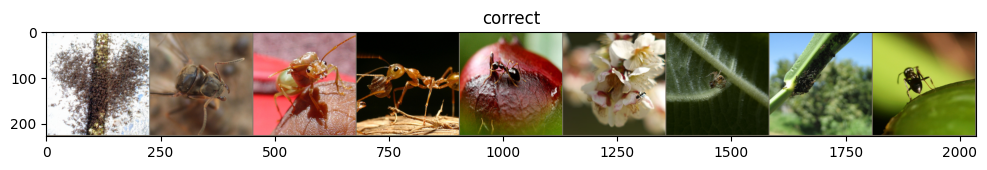

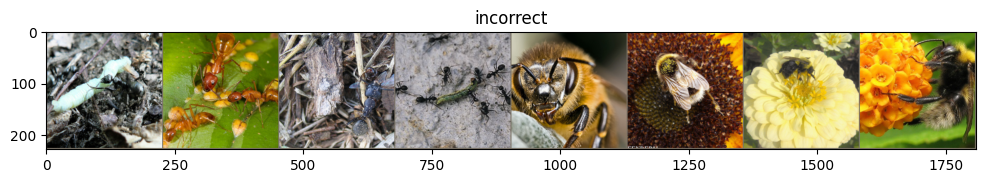

In [21]:
inputs = []
# Ï†ïÎãµÏùÑ ÎßûÏ∂ò Îç∞Ïù¥ÌÑ∞Ïùò Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÏ∂úÌïòÏó¨ inputs Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
for idx in correct_indices[:9]:
    inputs.append(val_data[idx][0])
# Ï∂îÏ∂úÌïú Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Í∑∏Î¶¨Îìú ÌòïÌÉúÎ°ú ÎÇòÏó¥
out = torchvision.utils.make_grid(inputs, nrow=9)
# Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌïú Í∑∏Î¶ºÏùò ÌÅ¨Í∏∞Î•º ÏÑ§Ï†ïÌïòÍ≥†, Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
plt.figure(figsize=(12, 4))
imshow(out, 'correct')  # 'correct'ÎùºÎäî Ï†úÎ™©ÏúºÎ°ú Ï†ïÎãµÏùÑ ÎßûÏ∂ò Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Ï∂úÎ†•

inputs = []
# Ï†ïÎãµÏùÑ ÌãÄÎ¶∞ Îç∞Ïù¥ÌÑ∞Ïùò Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÏ∂úÌïòÏó¨ inputs Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
for idx in incorrect_indices[:9]:
    inputs.append(val_data[idx][0])
# Ï∂îÏ∂úÌïú Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Í∑∏Î¶¨Îìú ÌòïÌÉúÎ°ú ÎÇòÏó¥
out = torchvision.utils.make_grid(inputs, nrow=9)
# Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌïú Í∑∏Î¶ºÏùò ÌÅ¨Í∏∞Î•º ÏÑ§Ï†ïÌïòÍ≥†, Ïù¥ÎØ∏ÏßÄÎ•ºÏ∂úÎ†•
plt.figure(figsize=(12, 4))
imshow(out, 'incorrect')  # 'incorrect'ÎùºÎäî Ï†úÎ™©ÏúºÎ°ú Ï†ïÎãµÏùÑ ÌãÄÎ¶∞ Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Ï∂úÎ†•

## Î∞©Î≤ï 2 : Pre-trained ResNetÏùÑ weight Í≥†Ï†ïÎêú ÌäπÏßï Ï∂îÏ∂úÍ∏∞Î°ú ÏÇ¨Ïö©

- ÎØ∏Î¶¨ ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò® ÌõÑ ÎßàÏßÄÎßâÏùò **ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µ ÎßåÏùÑ ÏÉàÎ°ú ÏûëÏÑ±**ÌïòÎêò ÎßàÏßÄÎßâ Í≥ÑÏ∏µÏùÑ Ï†úÏô∏Ìïú **Ïã†Í≤ΩÎßùÏùò Î™®Îì† Î∂ÄÎ∂ÑÏùÑ Í≥†Ï†ï** (``requires_grad == False`` Î°ú ÏÑ§Ï†ï)ÌïòÏó¨ ``backward()`` Ï§ëÏóê gradientÍ∞Ä Í≥ÑÏÇ∞ÎêòÏßÄ ÏïäÎèÑÎ°ù Ìï®

In [22]:
# ÏÇ¨Ï†Ñ ÌïôÏäµÎêú ResNet18 Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¥
model_conv = torchvision.models.resnet18(weights="DEFAULT")

# Î™®Îç∏Ïùò Î™®Îì† ÌååÎùºÎØ∏ÌÑ∞Î•º Í≥†Ï†ïÌïòÏó¨, ÌïôÏäµ Ï§ëÏóê ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÏóÖÎç∞Ïù¥Ìä∏ÎêòÏßÄ ÏïäÎèÑÎ°ù Ìï®
for param in model_conv.parameters():
    param.requires_grad = False

In [23]:
# Î™®Îç∏Ïùò ÎßàÏßÄÎßâ Fully Connected(FC) Î†àÏù¥Ïñ¥Ïùò ÏûÖÎ†• ÌäπÏÑ± ÏàòÎ•º Í∞ÄÏ†∏Ïò¥
num_features = model_conv.fc.in_features

# # ÎßàÏßÄÎßâ Î†àÏù¥Ïñ¥Îßå ÏÉàÎ°≠Í≤å ÌïôÏäµ
# Î™®Îç∏Ïùò ÎßàÏßÄÎßâ FC Î†àÏù¥Ïñ¥Î•º ÏÉàÎ°úÏö¥ Î†àÏù¥Ïñ¥Î°ú ÍµêÏ≤¥ÌïòÏó¨, Ï∂úÎ†• ÌÅ¥ÎûòÏä§ ÏàòÎ•º 2Î°ú ÏÑ§Ï†ï
model_conv.fc = nn.Linear(num_features, 2)
model_conv.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
# ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨ (ÏÑ±Îä•Ïù¥ Ìñ•ÏÉÅÎêòÏßÄ ÏïäÏùÑ Îïå ÏûêÎèô Ï°∞Ï†ï)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, mode="max", patience=3, factor=0.1)

## Train & Evaluation

In [24]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         scheduler, num_epochs=25)

Epoch 0/24
----------
Epoch 1/25==> train loss: 0.6019, val loss: 0.6048, train acc: 0.68, val acc: 0.71
Epoch 1/24
----------
Epoch 2/25==> train loss: 0.6460, val loss: 0.2495, train acc: 0.73, val acc: 0.89
Epoch 2/24
----------
Epoch 3/25==> train loss: 0.4320, val loss: 0.1980, train acc: 0.79, val acc: 0.94
Epoch 3/24
----------
Epoch 4/25==> train loss: 0.4184, val loss: 0.1942, train acc: 0.84, val acc: 0.92
Epoch 4/24
----------
Epoch 5/25==> train loss: 0.4846, val loss: 0.1885, train acc: 0.79, val acc: 0.95
Epoch 5/24
----------
Epoch 6/25==> train loss: 0.3770, val loss: 0.1959, train acc: 0.84, val acc: 0.92
Epoch 6/24
----------
Epoch 7/25==> train loss: 0.5215, val loss: 0.4344, train acc: 0.82, val acc: 0.85
Epoch 7/24
----------
Epoch 8/25==> train loss: 0.4552, val loss: 0.2230, train acc: 0.82, val acc: 0.92
Epoch 8/24
----------
Epoch 9/25==> train loss: 0.4931, val loss: 0.2079, train acc: 0.80, val acc: 0.93
Epoch 9/24
----------
Epoch 10/25==> train loss: 0.4046

In [25]:
predictions = []
labels = []

# Î™®Îç∏ÏùÑ ÌèâÍ∞Ä Î™®ÎìúÎ°ú ÏÑ§Ï†ï
with torch.inference_mode():
    for x, y in val_loader:
        x, y = x.to(device), y.to(device)
        z = model_conv(x)
        # Ï∂úÎ†•Í∞í Ï§ë ÏµúÎåÄÍ∞íÏùÑ Í∞ÄÏßÑ Ïù∏Îç±Ïä§Î•º ÏòàÏ∏°Í∞íÏúºÎ°ú ÏÑ†ÌÉù
        preds = z.argmax(1)

        # ÏòàÏ∏°Í∞íÏùÑ predictions Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
        predictions.extend(preds.cpu().numpy())
        # Ïã§Ï†ú Î†àÏù¥Î∏îÏùÑ labels Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
        labels.extend(y.cpu().numpy())

    # ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†ú Î†àÏù¥Î∏îÏù¥ ÏùºÏπòÌïòÎäî Ïù∏Îç±Ïä§Î•º Ï∞æÏùå
    correct_indices = np.nonzero(np.array(predictions) == np.array(labels))[0]
    # ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†ú Î†àÏù¥Î∏îÏù¥ Î∂àÏùºÏπòÌïòÎäî Ïù∏Îç±Ïä§Î•º Ï∞æÏùå
    incorrect_indices = np.nonzero(np.array(predictions) != np.array(labels))[0]

# Ï†ïÌôïÎèÑÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Ï∂úÎ†•
print(f"accuracy = {len(correct_indices) / len(predictions) * 100:.2f} %")

accuracy = 95.42 %


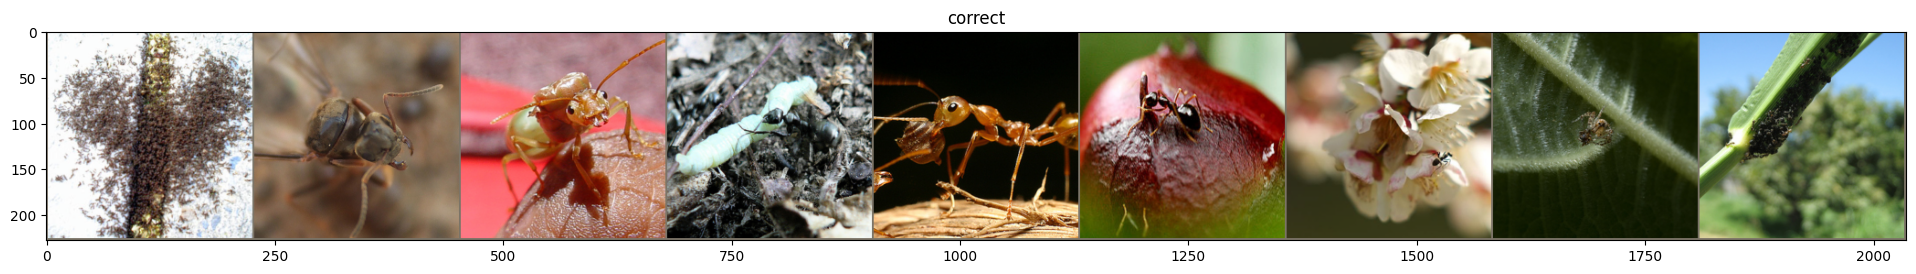

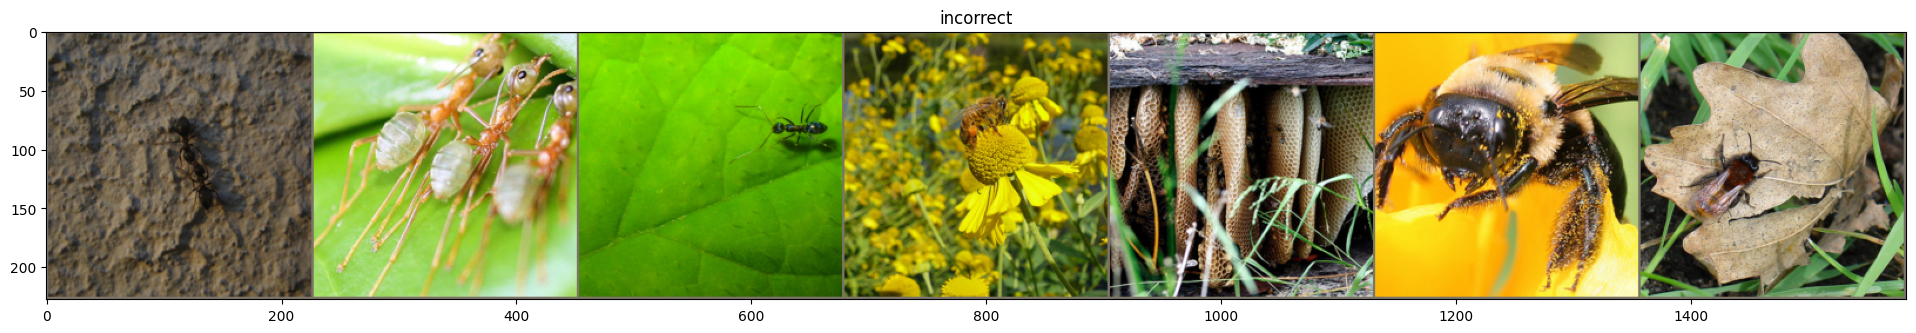

In [26]:
inputs = []
# Ï†ïÎãµÏùÑ ÎßûÏ∂ò Îç∞Ïù¥ÌÑ∞Ïùò Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÏ∂úÌïòÏó¨ inputs Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
for i, idx in enumerate(correct_indices[:9]):
    inputs.append(val_data[idx][0])
# Ï∂îÏ∂úÌïú Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Í∑∏Î¶¨Îìú ÌòïÌÉúÎ°ú ÎÇòÏó¥
out = torchvision.utils.make_grid(inputs, nrow=9)

plt.figure(figsize=(24, 8))
imshow(out, 'correct')  # 'correct'ÎùºÎäî Ï†úÎ™©ÏúºÎ°ú Ï†ïÎãµÏùÑ ÎßûÏ∂ò Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Ï∂úÎ†•

inputs = []
# Ï†ïÎãµÏùÑ ÌãÄÎ¶∞ Îç∞Ïù¥ÌÑ∞Ïùò Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÏ∂úÌïòÏó¨ inputs Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
for i, idx in enumerate(incorrect_indices[:9]):
    inputs.append(val_data[idx][0])
# Ï∂îÏ∂úÌïú Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Í∑∏Î¶¨Îìú ÌòïÌÉúÎ°ú ÎÇòÏó¥
out = torchvision.utils.make_grid(inputs, nrow=9)

plt.figure(figsize=(24, 8))
imshow(out, 'incorrect')  # 'incorrect'ÎùºÎäî Ï†úÎ™©ÏúºÎ°ú Ï†ïÎãµÏùÑ ÌãÄÎ¶∞ Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Ï∂úÎ†•